# Задание 1


1. Получите выборку с помощью следующего вызова:
```
make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Напишите метрику качества (`accuracy`), которая получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)

In [5]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X, y, random_state=10, test_size=0.5)
# GridSearch не нуждается в предварительном разбиении тк ему передаётся параметр cv
# Здесь эта строка просто для практики

In [6]:
from sklearn.model_selection import GridSearchCV, KFold

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid={
                                 'n_neighbors': range(1, 21, 1)
                                 },
                             cv=KFold(n_splits=5, random_state=10, shuffle=True))

In [ ]:
grid_searcher.fit(X, y)
grid_searcher.predict(X)

In [15]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y, grid_searcher.predict(X))

0.813

# Задание 2


Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от одного до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра.

Код ниже строит изображения средней зависимости качества от количества соседей. Выберите картинку, которая у вас получилась.


In [ ]:
def train_grid_search(X, y):
  grid_searcher = GridSearchCV(KNeighborsClassifier(),
                               param_grid={
                               'n_neighbors': range(1, 21)
                               }
                               )
  grid_searcher.fit(X, y)
  print(grid_searcher.cv_results_['mean_test_score'])

train_grid_search(X, y)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

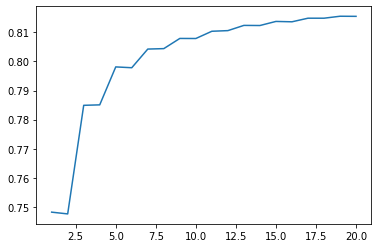

In [ ]:
def train_grid_search(X, y):
  grid_searcher = GridSearchCV(KNeighborsClassifier(),
                               param_grid={
                               'n_neighbors': range(1, 21)
                               }
                               )
  grid_searcher.fit(X, y)
  return grid_searcher.cv_results_['mean_test_score']

mean_test_scores = []
for i in range(1000):
  X, y = make_moons(n_samples=1000, noise=0.5)
  mean_test_score = train_grid_search(X, y)
  mean_test_scores.append(mean_test_score)

mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

# Задание 3

In [ ]:
!pip install python-mnist
!mkdir dir_with_mnist_data_files
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!mv train-images-idx3-ubyte.gz dir_with_mnist_data_files
!mv train-labels-idx1-ubyte.gz dir_with_mnist_data_files

In [2]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
mndata = MNIST('./dir_with_mnist_data_files', gz=True)
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

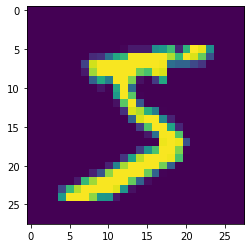

In [3]:
plt.imshow(images[0].reshape(28, 28))

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузит данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20. Какой accuracy вы получаете на тестовой выборке?

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [14]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [16]:
accuracy_score(y_test, knn.predict(X_test))

0.9574166666666667
